In [56]:
import numpy as np
import pandas as pd 
import fbprophet 
import plotly
import statsmodels
from statsmodels.tsa.stattools import acf
from matplotlib import pyplot
import altair as alt
import scipy
from scipy import signal
import spectrum 
from spectrum import WelchPeriodogram
from spectrum import Periodogram

#Extra
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [2]:
flu_data = pd.read_csv('flu.csv', header = 2, sep = ',')

In [23]:
flu_data.head(10)

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,United States of America,Region of the Americas of WHO,North America,2013,1,2012-12-31,2013-01-06,18219,18219,0.0,...,0.0,1653,5377,0,0,1097,1097,6474,NaN,Widespread Outbreak
1,United States of America,Region of the Americas of WHO,North America,2013,2,2013-01-07,2013-01-13,20013,20013,0.0,...,0.0,1767,5752,0,0,1145,1145,6897,NaN,Widespread Outbreak
2,United States of America,Region of the Americas of WHO,North America,2013,3,2013-01-14,2013-01-20,19228,19228,0.0,...,0.0,1624,4858,0,0,1078,1078,5936,NaN,Widespread Outbreak
3,United States of America,Region of the Americas of WHO,North America,2013,4,2013-01-21,2013-01-27,17139,17139,0.0,...,0.0,1528,4039,0,0,1091,1091,5130,NaN,Widespread Outbreak
4,United States of America,Region of the Americas of WHO,North America,2013,5,2013-01-28,2013-02-03,14795,14795,0.0,...,0.0,951,2963,0,0,1076,1076,4039,NaN,Widespread Outbreak
5,United States of America,Region of the Americas of WHO,North America,2013,6,2013-02-04,2013-02-10,13259,13259,0.0,...,0.0,706,2008,0,0,1051,1051,3059,NaN,Widespread Outbreak
6,United States of America,Region of the Americas of WHO,North America,2013,7,2013-02-11,2013-02-17,11468,11468,0.0,...,0.0,486,1353,0,0,1032,1032,2385,NaN,Widespread Outbreak
7,United States of America,Region of the Americas of WHO,North America,2013,8,2013-02-18,2013-02-24,10398,10398,0.0,...,0.0,363,985,0,0,1084,1084,2069,NaN,Widespread Outbreak
8,United States of America,Region of the Americas of WHO,North America,2013,9,2013-02-25,2013-03-03,9499,9499,0.0,...,0.0,289,730,0,0,1046,1046,1776,NaN,Widespread Outbreak
9,United States of America,Region of the Americas of WHO,North America,2013,10,2013-03-04,2013-03-10,8999,8999,0.0,...,0.0,200,562,0,0,1083,1083,1645,NaN,Regional Outbreak


In [28]:
#Percentages of positive results
flu_data["pct_positive"]=round((flu_data["ALL_INF"]/flu_data["SPEC_PROCESSED_NB"])*100,2)

In [29]:
flu_data.head(10)

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE,pct_positive
0,United States of America,Region of the Americas of WHO,North America,2013,1,2012-12-31,2013-01-06,18219,18219,0.0,...,1653,5377,0,0,1097,1097,6474,NaN,Widespread Outbreak,35.53
1,United States of America,Region of the Americas of WHO,North America,2013,2,2013-01-07,2013-01-13,20013,20013,0.0,...,1767,5752,0,0,1145,1145,6897,NaN,Widespread Outbreak,34.46
2,United States of America,Region of the Americas of WHO,North America,2013,3,2013-01-14,2013-01-20,19228,19228,0.0,...,1624,4858,0,0,1078,1078,5936,NaN,Widespread Outbreak,30.87
3,United States of America,Region of the Americas of WHO,North America,2013,4,2013-01-21,2013-01-27,17139,17139,0.0,...,1528,4039,0,0,1091,1091,5130,NaN,Widespread Outbreak,29.93
4,United States of America,Region of the Americas of WHO,North America,2013,5,2013-01-28,2013-02-03,14795,14795,0.0,...,951,2963,0,0,1076,1076,4039,NaN,Widespread Outbreak,27.30
5,United States of America,Region of the Americas of WHO,North America,2013,6,2013-02-04,2013-02-10,13259,13259,0.0,...,706,2008,0,0,1051,1051,3059,NaN,Widespread Outbreak,23.07
6,United States of America,Region of the Americas of WHO,North America,2013,7,2013-02-11,2013-02-17,11468,11468,0.0,...,486,1353,0,0,1032,1032,2385,NaN,Widespread Outbreak,20.80
7,United States of America,Region of the Americas of WHO,North America,2013,8,2013-02-18,2013-02-24,10398,10398,0.0,...,363,985,0,0,1084,1084,2069,NaN,Widespread Outbreak,19.90
8,United States of America,Region of the Americas of WHO,North America,2013,9,2013-02-25,2013-03-03,9499,9499,0.0,...,289,730,0,0,1046,1046,1776,NaN,Widespread Outbreak,18.70
9,United States of America,Region of the Americas of WHO,North America,2013,10,2013-03-04,2013-03-10,8999,8999,0.0,...,200,562,0,0,1083,1083,1645,NaN,Regional Outbreak,18.28


## Utility Functions

In [4]:
def make_realization(data_frame,x,y): 
    
    vis = alt.Chart(data_frame).mark_line().encode(
    x = x, 
    y = y
    )
    
    return vis

In [5]:
def make_autocorr(data_series, nlags=40, fft = False): 
    auto_corr = statsmodels.tsa.stattools.acf(data_series, nlags=nlags, fft=fft)
    data = pd.DataFrame(list(enumerate(auto_corr)), columns = ['Lag', 'AutoCor'])
    vis = alt.Chart(data).mark_bar().encode(
    x='Lag',
    y='AutoCor',
    )
    return vis

In [6]:
def make_sig_periodgram(data_series, fs = 1, scaling = 'density'): 
    f, Pxx_den = scipy.signal.periodogram(data_series, fs = fs, scaling=scaling)
    data = pd.DataFrame({'Freq' : f,'Density' : Pxx_den})
    vis = alt.Chart(data).mark_bar().encode(
        x='Freq',
        y='Density',
    )
    return vis

In [7]:
def make_welch_sig_periodgram(data_series, fs = 1, nperseg=50): 
    f, Pxx_den = scipy.signal.welch(flu_data.SPEC_RECEIVED_NB, fs = 1, nperseg=nperseg)
    data = pd.DataFrame({'Freq' : f,'Density' : Pxx_den})
    vis = alt.Chart(data).mark_bar().encode(
        x='Freq',
        y='Density',
    )
    return vis

In [8]:
def make_welch_periodgram(data_series, sampling = 50):
    psd = WelchPeriodogram(data_series, sampling)
    return psd[1]

In [31]:
#Based on spec_received
make_realization(flu_data, 'EDATE:T', 'SPEC_RECEIVED_NB')

alt.Chart(...)

In [10]:
alt.Chart(flu_data).mark_line().encode(
    x='EDATE:T',
    y='SPEC_RECEIVED_NB'
)


alt.Chart(...)

In [11]:
make_autocorr(flu_data.SPEC_RECEIVED_NB, nlags = 40)

alt.Chart(...)

In [12]:
SPEC_RECIEVD_NB_auto_cor = statsmodels.tsa.stattools.acf(flu_data.SPEC_RECEIVED_NB)

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


In [13]:
data = pd.DataFrame(list(enumerate(SPEC_RECIEVD_NB_auto_cor)), columns = ['Lag', 'AutoCor'])
alt.Chart(data).mark_bar().encode(
    x='Lag',
    y='AutoCor',
)

alt.Chart(...)

In [14]:
make_sig_periodgram(flu_data.SPEC_RECEIVED_NB)

alt.Chart(...)

In [15]:
f, Pxx_den = scipy.signal.periodogram(flu_data.SPEC_RECEIVED_NB, fs = 1, scaling='density')

In [16]:
data = pd.DataFrame({'Freq' : f,'Density' : Pxx_den})
alt.Chart(data).mark_bar().encode(
    x='Freq',
    y='Density',
)

alt.Chart(...)

In [17]:
make_welch_sig_periodgram(flu_data.SPEC_RECEIVED_NB, fs = 1, nperseg=420)

alt.Chart(...)

In [18]:
f, Pxx_den = scipy.signal.welch(flu_data.SPEC_RECEIVED_NB, fs = 1, nperseg=420)

In [19]:
data = pd.DataFrame({'Freq' : f,'Density' : Pxx_den})
alt.Chart(data).mark_bar().encode(
    x='Freq',
    y='Density',
)

alt.Chart(...)

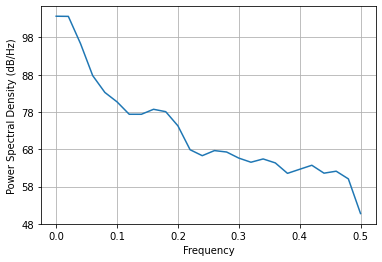

In [20]:
make_welch_periodgram(flu_data.SPEC_RECEIVED_NB,sampling = 50)

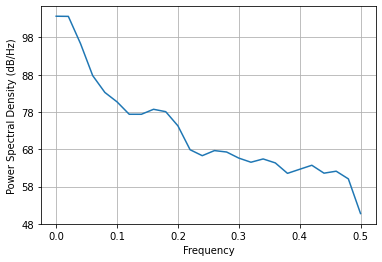

In [21]:
psd = WelchPeriodogram(flu_data.SPEC_RECEIVED_NB,50)

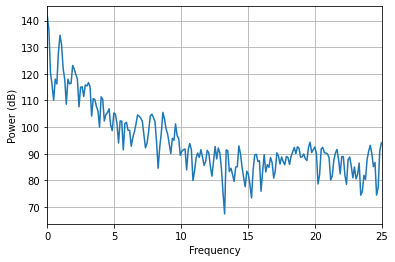

In [22]:
psd = Periodogram(flu_data.SPEC_RECEIVED_NB, 50, scale_by_freq = True)
psd.plot()

# Charts based on pct_positive
> pct_positive = (flu_data["ALL_INF"]/flu_data["SPEC_PROCESSED_NB"])*100

In [39]:
#Based on pct_positive
make_realization(flu_data, 'EDATE:T', 'pct_positive')


alt.Chart(...)

In [40]:
#pct_positive
alt.Chart(flu_data).mark_line().encode(
    x='EDATE:T',
    y='pct_positive'
)

alt.Chart(...)

In [41]:
#pct_positive
make_autocorr(flu_data.pct_positive, nlags = 40)

alt.Chart(...)

In [42]:
#pct_positive
pct_positive_auto_cor = statsmodels.tsa.stattools.acf(flu_data.pct_positive)

In [43]:
#pct_positive_auto_cor
data = pd.DataFrame(list(enumerate(pct_positive_auto_cor)), columns = ['Lag', 'AutoCor'])
alt.Chart(data).mark_bar().encode(
    x='Lag',
    y='AutoCor',
)

alt.Chart(...)

In [44]:
#pct_positive
make_sig_periodgram(flu_data.pct_positive)

alt.Chart(...)

In [45]:
f2, Pxx_den2 = scipy.signal.periodogram(flu_data.pct_positive, fs = 1, scaling='density')

In [46]:
data = pd.DataFrame({'Freq' : f2,'Density' : Pxx_den2})
alt.Chart(data).mark_bar().encode(
    x='Freq',
    y='Density',
)

alt.Chart(...)

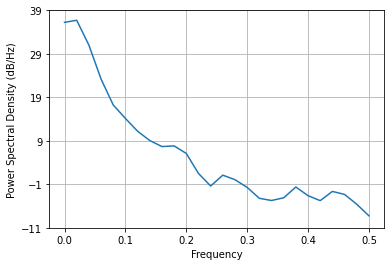

In [47]:
make_welch_periodgram(flu_data.pct_positive,sampling = 50)

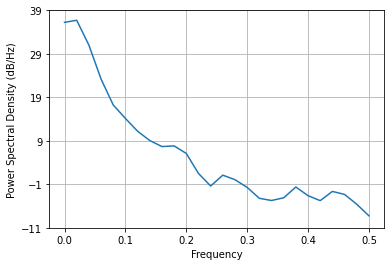

In [49]:
psd = WelchPeriodogram(flu_data.pct_positive,50)

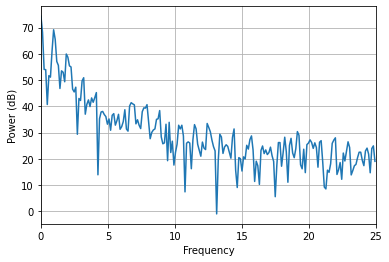

In [50]:
psd = Periodogram(flu_data.pct_positive, 50, scale_by_freq = True)
psd.plot()

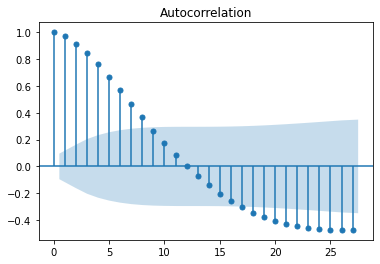

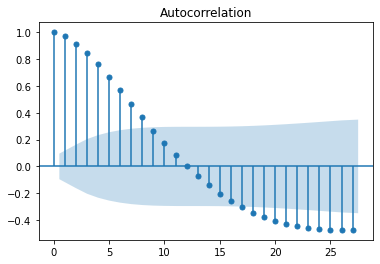

In [55]:
#acf plot

sm.graphics.tsa.plot_acf(flu_data.pct_positive)

### This doesn't look stationary... I'm going to try an ARIMA and see what happens

In [80]:
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html?highlight=arima#statsmodels.tsa.arima.model.ARIMA
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

model = ARIMA(flu_data.pct_positive.values, order=(5,1,0))
model_fit = model.fit()

In [81]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  423
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -733.086
Date:                Thu, 18 Feb 2021   AIC                           1478.172
Time:                        22:13:36   BIC                           1502.442
Sample:                             0   HQIC                          1487.763
                                - 423                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6490      0.033     19.392      0.000       0.583       0.715
ar.L2          0.0143      0.036      0.403      0.687      -0.055       0.084
ar.L3          0.0116      0.050      0.231      0.818      -0.087       0.110
ar.L4          0.0220      0.053      0.418      0.676      -0.081       0.125
ar.L5          0.0164      0.046      0.354      0.723      -0.074       0.107
sigma2         1.8870      0.068     27.596      0.000       1.753       2.021
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               651.19
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.67
Prob(H) (two-sided):                  0.67   Kurtosis:                         8.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

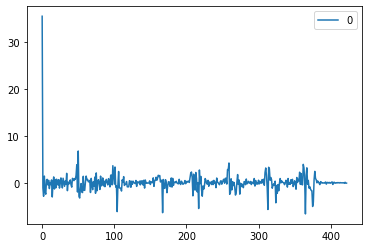

In [82]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

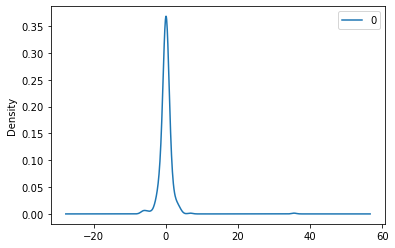

In [83]:
residuals.plot(kind='kde')
pyplot.show()

In [84]:
residuals.describe()

,0
count,423.000000
mean,0.060036
std,2.208202
min,-6.635514
25%,-0.443544
50%,0.024099
75%,0.547323
max,35.530000


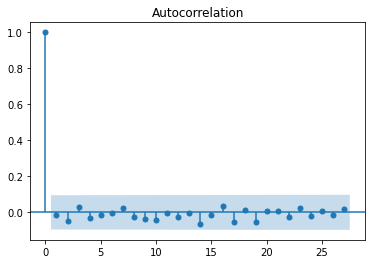

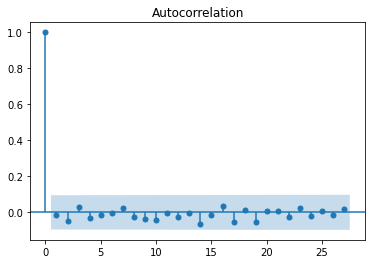

In [85]:
sm.graphics.tsa.plot_acf(residuals.values)

#### The acf plot means the model isn't bad, right?

In [99]:
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


#Prediction
X = flu_data.pct_positive.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [100]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=6.051600, expected=4.980000
predicted=3.392371, expected=3.570000
predicted=2.418052, expected=2.780000
predicted=2.126860, expected=1.750000
predicted=1.099079, expected=1.780000
predicted=1.649527, expected=1.500000
predicted=1.327618, expected=1.150000
predicted=0.952452, expected=1.200000
predicted=1.143077, expected=1.280000
predicted=1.338418, expected=1.210000
predicted=1.196936, expected=1.440000
predicted=1.551074, expected=1.220000
predicted=1.123729, expected=1.250000
predicted=1.247851, expected=1.250000
predicted=1.232931, expected=1.060000
predicted=0.971768, expected=1.850000
predicted=2.260635, expected=1.660000
predicted=1.663308, expected=2.040000
predicted=2.260596, expected=2.020000
predicted=2.008752, expected=1.970000
predicted=1.980550, expected=1.680000
predicted=1.482679, expected=2.050000
predicted=2.223709, expected=2.060000
predicted=2.114100, expected=2.370000
predicted=2.571530, expected=2.530000
predicted=2.638257, expected=2.570000
predicted=2.

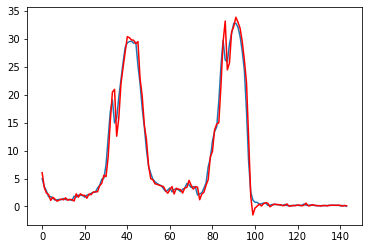

In [101]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

I think I did something wrong  here